# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

data = pd.read_csv("winning_400m.csv")
data["year"] = pd.to_datetime(data["year"].astype(str))
data.set_index("year", inplace=True)
data.index = data.index.to_period("Y")

In [3]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

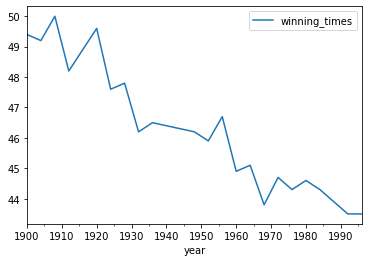

In [4]:
# Plot the time series
data.plot();

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [24]:
# Difference the time series
data_diff = data.diff()[1:]
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

In [22]:
plot_acf?

Signature:
plot_acf(
    x,
    ax=None,
    lags=None,
    *,
    alpha=0.05,
    use_vlines=True,
    adjusted=False,
    fft=False,
    missing='none',
    title='Autocorrelation',
    zero=True,
    vlines_kwargs=None,
    **kwargs,
)
Docstring:
Plot the autocorrelation function

Plots lags on the horizontal and the correlations on vertical axis.

Parameters
----------
x : array_like
    Array of time-series values
ax : AxesSubplot, optional
    If given, this subplot is used to plot in instead of a new figure being
    created.
lags : {int, array_like}, optional
    An int or array of lag values, used on horizontal axis. Uses
    np.arange(lags) when lags is an int.  If not provided,
    ``lags=np.arange(len(corr))`` is used.
alpha : scalar, optional
    If a number is given, the confidence intervals for the given level are
    returned. For instance if alpha=.05, 95 % confidence intervals are
    returned where the standard deviation is computed according to
    Bartlett's formul

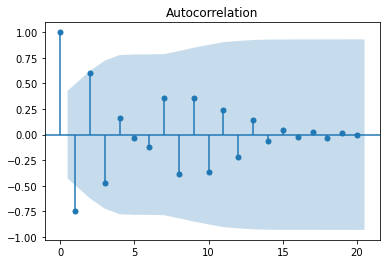

In [32]:
# Plot the ACF
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_diff,lags=20);

In [25]:
acf(data_diff)

/home/jd/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/home/jd/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        , -0.74620727,  0.60687271, -0.475035  ,  0.15845481,
       -0.02981525, -0.12461536,  0.36061178, -0.3843639 ,  0.36012638,
       -0.36068914,  0.24030761, -0.21912224,  0.14567096, -0.06442709,
        0.04330411, -0.02618286,  0.02877332, -0.03109675,  0.01618164,
        0.00125156])

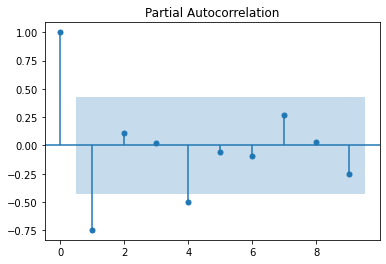

In [21]:
# Plot the PACF
plot_pacf(data_diff,lags=9,method='ywm');

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [35]:
from statsmodels.tsa.arima.model import ARIMA
ARIMA?

Init signature:
ARIMA(
    endog,
    exog=None,
    order=(0, 0, 0),
    seasonal_order=(0, 0, 0, 0),
    trend=None,
    enforce_stationarity=True,
    enforce_invertibility=True,
    concentrate_scale=False,
    trend_offset=1,
    dates=None,
    freq=None,
    missing='none',
)
Docstring:     
Autoregressive Integrated Moving Average (ARIMA) model, and extensions

This model is the basic interface for ARIMA-type models, including those
with exogenous regressors and those with seasonal components. The most
general form of the model is SARIMAX(p, d, q)x(P, D, Q, s). It also allows
all specialized cases, including

- autoregressive models: AR(p)
- moving average models: MA(q)
- mixed autoregressive moving average models: ARMA(p, q)
- integration models: ARIMA(p, d, q)
- seasonal models: SARIMA(P, D, Q, s)
- regression with errors that follow one of the above ARIMA-type models

Parameters
----------
endog : array_like, optional
    The observed time-series process :math:`y`.
exog : ar

In [42]:
arma_model = ARIMA(data_diff,order=(1,0,1)).fit()
arma_model.aic, \
    arma_model.bic

(47.91557128155985, 52.09366103245354)

In [41]:
arma_model = ARIMA(data_diff,order=(1,0,0)).fit()
arma_model.aic, \
    arma_model.bic

(46.107337079417384, 49.24090439258765)

In [43]:
arma_model = ARIMA(data_diff,order=(1,0,2)).fit()
arma_model.aic, \
    arma_model.bic

(48.15170636030076, 53.37431854891787)

In [44]:
arma_model = ARIMA(data_diff,order=(2,0,1)).fit()
arma_model.aic, \
    arma_model.bic

(49.8617736376721, 55.084385826289214)

## What is your final model? Why did you pick this model?

In [ ]:
# Your comments here

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 